In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

In [5]:
sys.path.append('../ga/mpi_scripts/')
from ina_model import InaModel

In [6]:
dirname = '../src/model_ctypes/'
filename_so = os.path.join(dirname, 'ina.so')

filename_so_abs = os.path.abspath(filename_so)
Ina = InaModel(filename_so_abs)

In [8]:
legend_algebraic = pd.read_csv('../src/model_ctypes/legend_algebraic.csv', index_col='name').value
legend_constants = pd.read_csv('../src/model_ctypes/legend_constants.csv', index_col='name').value
legend_states = pd.read_csv('../src/model_ctypes/legend_states.csv', index_col='name').value

A = legend_algebraic.copy()
C = legend_constants.copy()
S = legend_states.copy()


In [9]:
df_protocol = pd.read_csv('../data/protocols/activation.csv')
df_initial_state_protocol = pd.read_csv('../data/protocols/activation_initial_state.csv')

In [10]:
C.c_m = 5e-11
C.R = 5e7

In [11]:
I, I_a = Ina.run(A,S,C,df_protocol, df_initial_state_protocol, 20, return_algebraic=True)

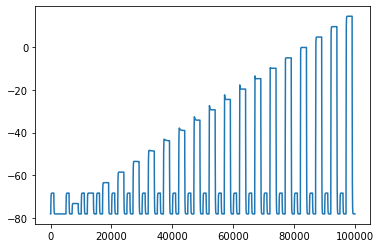

In [12]:
plt.plot(I.v_m)